# Module 03: EDA

In [36]:
# packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from sklearn.model_selection import train_test_split 
from ISLP import load_data

# set seed
seed = 2323

### We'll use the _Hitters_ data from ISLP for this activity. The metadata for _Hitters_ can be found [here](https://intro-stat-learning.github.io/ISLP/datasets/Hitters.html).

In [2]:
# Load the data
Hitters = load_data('Hitters')

### Determine the number of rows and columns in the dataset by returning its "shape" attribute

In [3]:
Hitters.shape

(322, 20)

### Determine whether each feature is numeric or categorical by returning the "dtype" attribute for each column

In [7]:
for col in Hitters.columns:
    print(col, Hitters[col].dtype)
    

AtBat int64
Hits int64
HmRun int64
Runs int64
RBI int64
Walks int64
Years int64
CAtBat int64
CHits int64
CHmRun int64
CRuns int64
CRBI int64
CWalks int64
League category
Division category
PutOuts int64
Assists int64
Errors int64
Salary float64
NewLeague category


### Before doing any other analyses, let's create training and test sets.

In [8]:
Train, Test = train_test_split(Hitters, 
                               random_state=seed, 
                               test_size=0.40, 
                               shuffle=True) 

### Based on the metadata, what is the difference between the 6 columns starting with 'C' and the 6 related columns that don't?

The columns that start with C indicate career stats while the related ones that don't refer to stats in the 1986 season specifically.

### On the training set, create pairwise scatterplots for each of these 6 columns with the 'Salary' variable.

<function matplotlib.pyplot.show(close=None, block=None)>

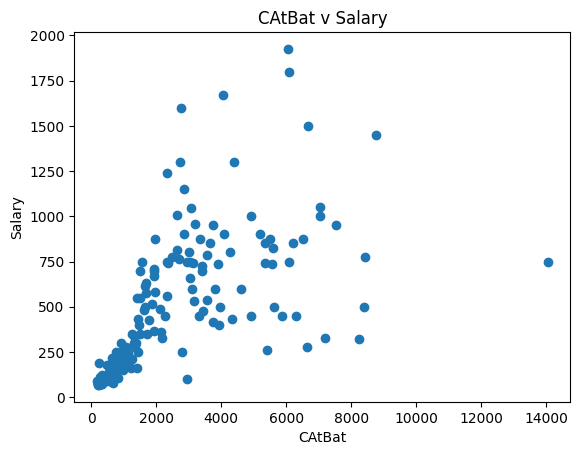

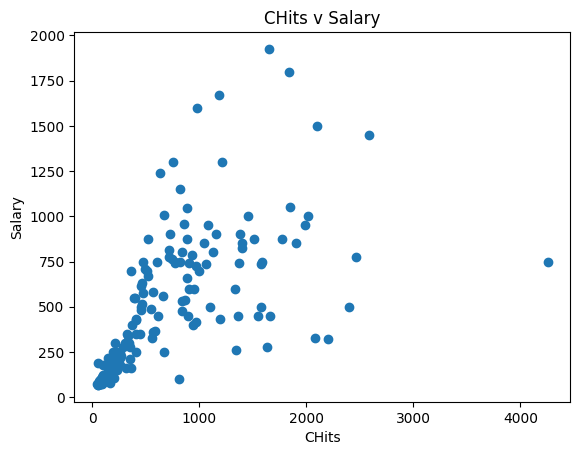

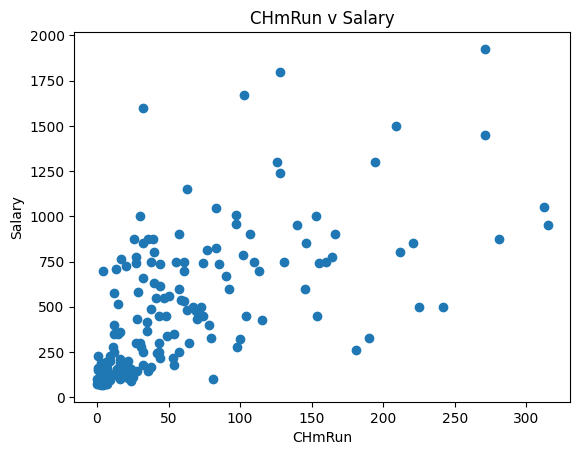

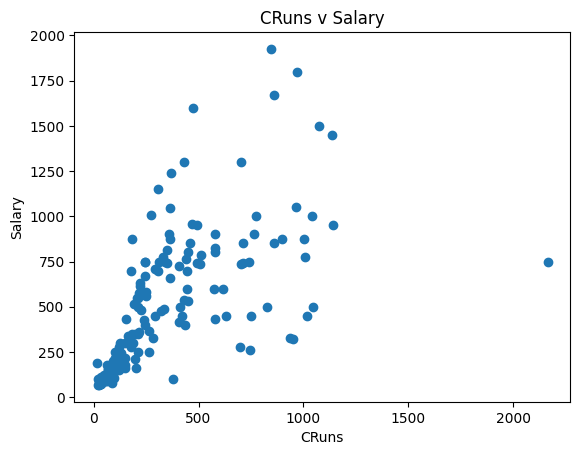

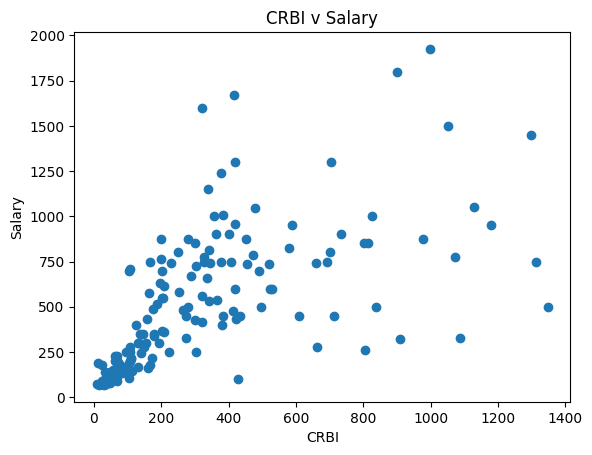

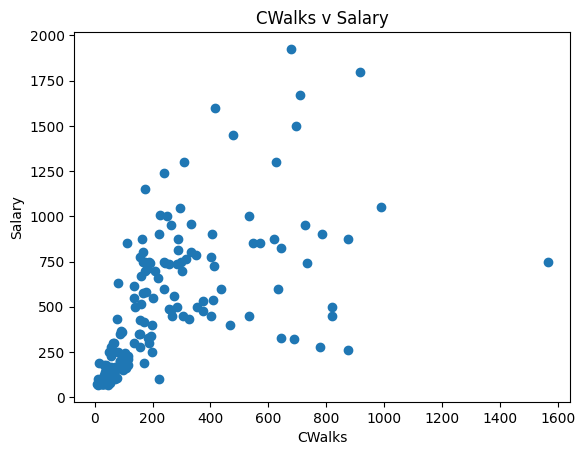

In [24]:
for i in range(Train.columns.get_loc('CAtBat'), Train.columns.get_loc('CAtBat')+6):
    fig, ax = plt.subplots()
    ax.scatter(Train.iloc[:,i],Train['Salary'])
    ax.set_title(Train.columns[i] + ' v Salary')
    ax.set_xlabel(Train.columns[i])
    ax.set_ylabel('Salary')

plt.show


### Use the "describe" method to determine the mean, standard deviation, and 5 number summary of all numeric variables in the training subset of _Hitters_.

In [29]:
for c in Train.columns:
    if ((Train[c].dtype == 'int64') or (Train[c].dtype == 'float64')):
        print(Train[c].describe())
        print()

count    193.000000
mean     381.829016
std      145.679181
min       19.000000
25%      271.000000
50%      369.000000
75%      508.000000
max      687.000000
Name: AtBat, dtype: float64

count    193.000000
mean     101.549223
std       44.267521
min        7.000000
25%       68.000000
50%       95.000000
75%      136.000000
max      223.000000
Name: Hits, dtype: float64

count    193.000000
mean      10.150259
std        8.228711
min        0.000000
25%        4.000000
50%        8.000000
75%       14.000000
max       40.000000
Name: HmRun, dtype: float64

count    193.000000
mean      50.751295
std       24.784284
min        1.000000
25%       32.000000
50%       47.000000
75%       68.000000
max      130.000000
Name: Runs, dtype: float64

count    193.000000
mean      47.093264
std       24.912589
min        2.000000
25%       29.000000
50%       43.000000
75%       61.000000
max      121.000000
Name: RBI, dtype: float64

count    193.000000
mean      38.445596
std       21.136915

### It looks like the mean and median of 'AtBat' are nearly equal. This _might_ suggest that this variable is normally distributed. Create a histogram of 'AtBat' to check this hypothesis.

(array([ 1.,  4., 31., 23., 34., 20., 24., 24., 24.,  8.]),
 array([ 19. ,  85.8, 152.6, 219.4, 286.2, 353. , 419.8, 486.6, 553.4,
        620.2, 687. ]),
 <BarContainer object of 10 artists>)

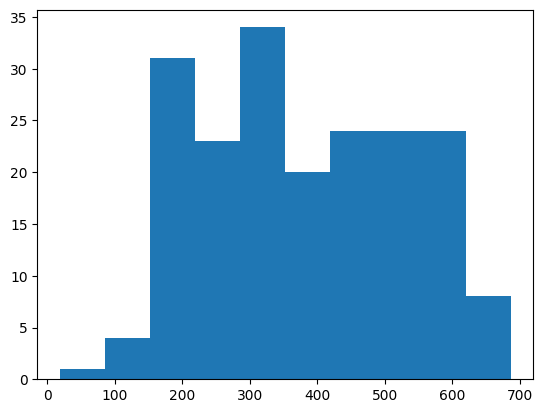

In [30]:
plt.hist(Train['AtBat'])

### Let's standardize the AtBat feature (i.e., normalize by z-scores). We'll create a new column in the training data called 'AtBat_st' to represent this.

In [37]:
avg = Train['AtBat'].mean()
stdev = Train['AtBat'].std()
Train['AtBat_st'] = (Train['AtBat'] - avg)/stdev

### How many rows have an 'AtBat' value within the first standard deviation?

Hint: the 'len' magic method returns the number of rows of a dataFrame.

In [41]:
len(abs(Train['AtBat_st']) <= 1)

193

### Going back to the results of the 'describe' method, how can you tell that the 'Salary' variable has missing values?

It has a count value that is less than the count values of other columns.

### Describe a situation where a variable could have missing values but this would not be reflected in the results of the 'describe' method.

### On the training data, create separate boxplots of the 'AtBat' variable for when 'Salary' is populated or missing.

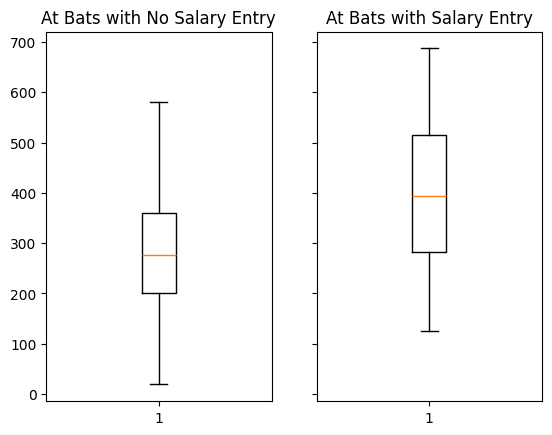

In [57]:
NoSalary = Train[Train['Salary'].isnull()]['AtBat']
YesSalary = Train[Train['Salary'].notnull()]['AtBat']

fig, axs = plt.subplots(1,2,sharey = True)

axs[0].boxplot(NoSalary)
axs[0].set_title('At Bats with No Salary Entry')

axs[1].boxplot(YesSalary)
axs[1].set_title('At Bats with Salary Entry')

plt.show()

### Create a correlation matrix for all numeric features in the training set

In [ ]:
#fillin

### Propose two different ways of imputing the missing values of Salary while taking advantage of the information given in the boxplots or the correlation matrix.

#fillin Type your answer here.

### For our last exercise, we'll explore Hits and Walks relative to AtBat totals. 
- Use the sum function to calculuate the totals of each of these three variables for the 1986 season (on the training set). 
- Create a pie chart which shows total hits, total walks, and remaining total (neither) as percents of the At Bats total (on the training set). 

In [ ]:
TotHits = #fillin
TotWalks = #fillin
TotAtBat = #fillin

Labels = ['Hits', 'Walks', 'Neither']
Totals = [TotHits, TotWalks, TotAtBat-TotHits-TotWalks]

In [ ]:
# pie chart


### The previous two cells gave us totals across all players. For each player in the training set, calculate the Hits as a percent of AtBat and store it in a new variable called 'AVG'

In [ ]:
#fillin

### Using 0.25 and 0.31 as the split points, create a new variable with three bins: high, medium, and low. 

In [ ]:
Train['AVG_bin'] = 'medium'
Train['AVG_bin'][#fillin] = 'low'
Train['AVG_bin'][#fillin] = 'high'

### Create a bar chart that displays the number of players in each of the low, medium, and high categories (for the training data).

In [ ]:
Train['AVG_bin'].value_counts()

Notice that the order of the bars will be medium, low, high. That's counterintuitive. We can reorder these quickly. 

In [ ]:
indexMap = ['low', 'medium', 'high']
reordered_list = [Train['AVG_bin'].value_counts()[i] for i in indexMap]

In [ ]:
plt.bar(#fillin

plt.title("1986 AVG (Training Set)")
plt.ylabel("Number of Players")

plt.xticks(#fillin

plt.show()

### Did we use the depth method or width method for creating these bins? Explain.

#fillin Type your answer here.